In [1]:
import pandas as pd                
import numpy as np                
import matplotlib.pyplot as plt    
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
kyphosis_df = pd.read_csv('C:/Users/shank/Downloads/Kyphosis+Disease+Classification/Kyphosis Disease Classification/kyphosis.csv')

In [4]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [6]:
kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [7]:
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


C:\Users\shank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

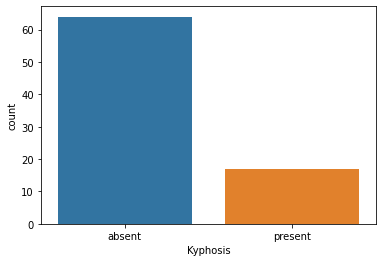

In [8]:
sns.countplot(kyphosis_df['Kyphosis'], label = 'Count')

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
LabelEncoder_y = LabelEncoder()

In [11]:
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [12]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [14]:
kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6
80,0,36,4,13


In [15]:
kyphosis_False = kyphosis_df[kyphosis_df['Kyphosis']== 0]

In [16]:
kyphosis_False.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16


In [17]:
print ('Disease absent after operation percentage = ', (len(kyphosis_False)/len(kyphosis_df)) * 100, '%')

Disease absent after operation percentage =  79.01234567901234 %


In [18]:
kyphosis_True = kyphosis_df[kyphosis_df['Kyphosis']== 1]

In [19]:
kyphosis_True.head()

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12


In [20]:
print ('Disease present after operation percentage = ', (len(kyphosis_True)/len(kyphosis_df)) * 100, '%') 

Disease present after operation percentage =  20.98765432098765 %


<AxesSubplot:>

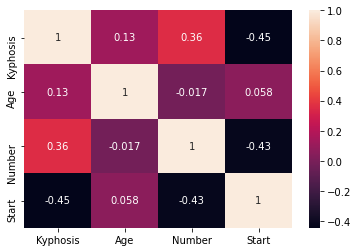

In [21]:
sns.heatmap(kyphosis_df.corr(), annot = True)

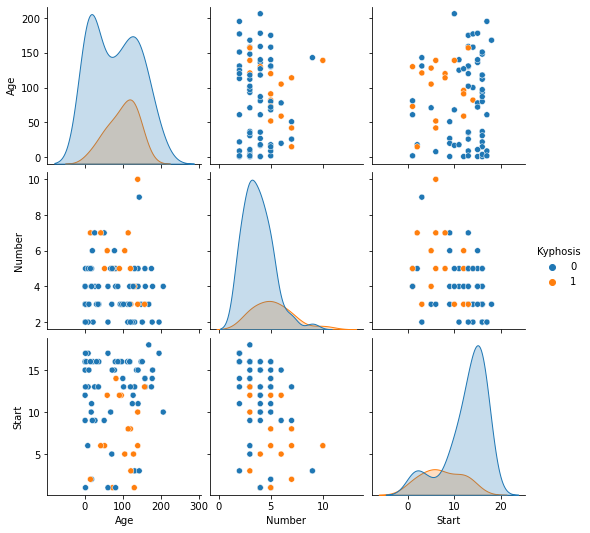

In [22]:
sns.pairplot(kyphosis_df, hue = 'Kyphosis', vars = ['Age', 'Number', 'Start'])

In [23]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [24]:
X = kyphosis_df.drop(['Kyphosis'], axis = 1)

In [25]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [26]:
y = kyphosis_df['Kyphosis']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [29]:
X_train.shape

(56, 3)

In [30]:
y_train.shape

(56,)

In [31]:
X_test.shape

(25, 3)

In [32]:
y_test.shape

(25,)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
y_predict_test = decision_tree.predict(X_test)

In [37]:
y_predict_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0])

In [38]:
y_test

0     0
20    0
10    1
63    0
77    0
14    0
6     0
66    0
76    1
23    0
25    0
4     0
79    1
13    0
56    0
15    0
45    1
24    1
43    0
42    0
73    0
1     0
53    0
57    1
36    0
Name: Kyphosis, dtype: int32

In [39]:
cm = confusion_matrix(y_test, y_predict_test)

<AxesSubplot:>

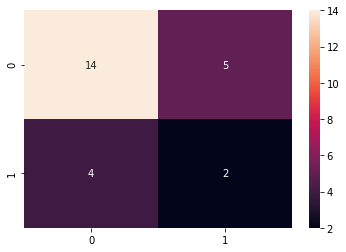

In [40]:
sns.heatmap(cm, annot = True)

In [41]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        19
           1       0.29      0.33      0.31         6

    accuracy                           0.64        25
   macro avg       0.53      0.54      0.53        25
weighted avg       0.66      0.64      0.65        25



In [42]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [43]:
y_predict_test = RandomForest.predict(X_test)

<AxesSubplot:>

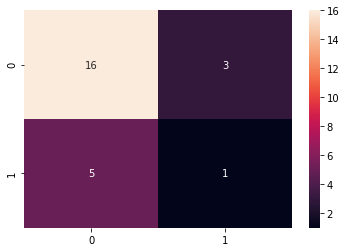

In [44]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [45]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.25      0.17      0.20         6

    accuracy                           0.68        25
   macro avg       0.51      0.50      0.50        25
weighted avg       0.64      0.68      0.66        25



In [69]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [70]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=RandomForest, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=150),
             param_grid={'criterion': ['gini'], 'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto'], 'n_estimators': [200]})

In [67]:
y_predict_test2 = CV_rfc.predict(X_test)

<AxesSubplot:>

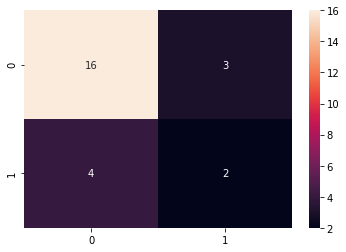

In [68]:
cm = confusion_matrix(y_test, y_predict_test2)
sns.heatmap(cm, annot=True)

In [57]:
print(classification_report(y_test, y_predict_test2))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.25      0.17      0.20         6

    accuracy                           0.68        25
   macro avg       0.51      0.50      0.50        25
weighted avg       0.64      0.68      0.66        25

